In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer, balanced_accuracy_score


from sklearn.linear_model import LassoCV
from joblib import load

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
all_df = pd.read_csv("../dataset/H37RvGC+CAI+Acimo.csv")
selected_columns=["locus tag","essential","DNA","protein sequence"]
Xs= all_df.drop(columns=selected_columns)
y=all_df["essential"]
scorer = make_scorer(balanced_accuracy_score)

In [3]:
model_rf = load('../../model/random_forest_model_lasso.joblib')

In [4]:
lassoCV = LassoCV(cv=10,random_state=10)
lassoCV.fit(Xs,y)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e-01, tolerance: 5.063e-02
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=10, random_state=10)

In [5]:
all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
print("Best alpha: ", lassoCV.alpha_)
print("Lasso coefficient: ", lassoCV.coef_)
selected_features = [feature for feature, coef in zip(all_feature_names, lassoCV.coef_) if coef !=0]
print(selected_features)

Best alpha:  2.2551471627010748e-06
Lasso coefficient:  [0.54207371 0.24804407 1.84417965 2.03427176 2.09474188 3.10176451
 0.67887584 3.06574086 2.64492157 2.49410496 2.64289428 3.33754563
 3.06040777 5.03505842 1.73755017 2.17352518 1.77571746 1.66924953
 2.58867354 0.39160692 1.64897086 3.07428589]
['GC_Content', 'CAI', 'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']


In [6]:
selected_features = ['GC_Content', 'CAI', 'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
score = cross_val_score(model_rf,Xs[selected_features],y,cv=5,scoring=scorer).mean()
print(score)

0.5061324901134906


D:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


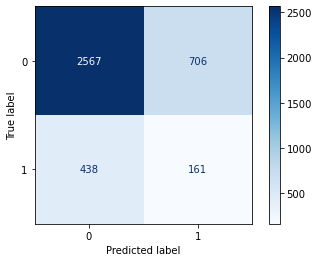

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
X_evl_test_rf = np.array(Xs[selected_features])
y_evl_test = np.array(y)
disp = ConfusionMatrixDisplay.from_estimator(model_rf,X_evl_test_rf,y_evl_test,cmap=plt.cm.Blues)

In [9]:
model_xgb = load("../../model/XGBoost_model_lasso.joblib")

In [10]:
score = cross_val_score(model_xgb,Xs[selected_features],y,cv=5,scoring=scorer).mean()
print(score)

0.5295314729295317


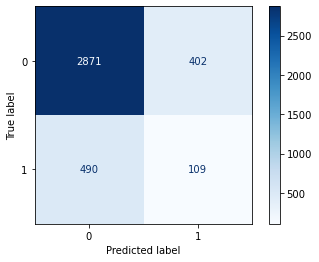

In [11]:
X_evl_test_xgb = np.array(Xs[selected_features])

disp_xgb = ConfusionMatrixDisplay.from_estimator(model_xgb,X_evl_test_xgb,y_evl_test,cmap=plt.cm.Blues)

In [12]:
model_mlp = load("../../model/MLP_model_lasso.joblib")

In [13]:
score = cross_val_score(model_mlp,Xs[selected_features],y,cv=5,scoring=scorer).mean()
print(score)

0.5


D:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


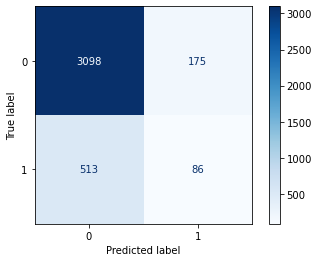

In [14]:
X_evl_test_xgb = np.array(Xs[selected_features])

disp_xgb = ConfusionMatrixDisplay.from_estimator(model_mlp,X_evl_test_xgb,y_evl_test,cmap=plt.cm.Blues)

In [15]:
from scipy.stats import ks_2samp

model_rf_prediction = model_rf.predict(Xs[selected_features])
model_xgb_prediction = model_xgb.predict(Xs[selected_features])
model_mlp_prediction = model_mlp.predict(Xs[selected_features])

statistic_xgb_rf, p_value_xgb_rf = ks_2samp(model_xgb_prediction, model_rf_prediction)
statistic_mlp_rf, p_value_mlp_rf = ks_2samp(model_mlp_prediction, model_rf_prediction)
statistic_xgb_mlp, p_value_xgb_mlp, = ks_2samp(model_xgb_prediction, model_mlp_prediction)

if p_value_xgb_rf < 0.05:
    print("Reject the null hypothesis: The distributions of xgboost and random forest are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of xgboost and random forest are the same.")

if p_value_mlp_rf < 0.05:
    print("Reject the null hypothesis: The distributions of MLP and random forest are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of MLP and random forest are the same.")
    
if p_value_xgb_mlp < 0.05:
    print("Reject the null hypothesis: The distributions of xgboost and MLP are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of xgboost and MLP are the same.")

Reject the null hypothesis: The distributions of xgboost and random forest are different.
Reject the null hypothesis: The distributions of MLP and random forest are different.
Reject the null hypothesis: The distributions of xgboost and MLP are different.
